In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


'D:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math, os, sys, datetime
from simulator import Simulator
import warnings
warnings.filterwarnings('ignore')
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
#from utils.batch_manager import fit_into_batch, extract_from_batch
#from utils.preprocessstock import preprocess

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [5]:
# USER INPUT SECTION #
DATA_CSV_PATH = 'AAPL'
MODEL_TYPE = 'tdnn' # tdnn, tdnn_pso, svm, rf
BALANCE = 1000000
BUY_LIMIT_FROM_BALANCE_PORTION = 1/3
TRADE_BASE_FEE = 0
TRADE_FEE = .15
VAT = 7
CUT_LOSS = 2
UNIT_MULTIPLIER = 100
EMA_ALPHA = 0.25
ADAPTIVE_EMA_ALPHA = False
TRADE_SENSITIVITY = .05
TRADE_FREQUENCY = 1
ANNUALIZED_RISK_FREE_RATE = .48 # in percentage
#CURRENT_UNIT = 0
#MAX_UNIT_BUY_PER_TRADE = 10 # total number of trading unit come from MAX_UNIT_BUY_PER_TRADE * UNIT_MULTIPLIER
#MAX_UNIT_SELL_PER_TRADE = 10 # total number of trading unit come from MAX_UNIT_SELL_PER_TRADE * UNIT_MULTIPLIER

In [6]:
simulator = Simulator(csv_file_path=DATA_CSV_PATH,
                     model_type=MODEL_TYPE,
                     balance=BALANCE,
                     buy_limit_from_balance_portion=BUY_LIMIT_FROM_BALANCE_PORTION,
                     trade_base_fee=TRADE_BASE_FEE,
                     trade_fee=TRADE_FEE,
                     vat=VAT,
                     cut_loss=CUT_LOSS,
                     unit_multiplier=UNIT_MULTIPLIER,
                     trade_sensitivity=TRADE_SENSITIVITY,
                     ema_alpha=EMA_ALPHA,
                     adaptive_ema_alpha=ADAPTIVE_EMA_ALPHA,
                     trade_freq=TRADE_FREQUENCY,
                     annualized_rf=ANNUALIZED_RISK_FREE_RATE)

In [7]:
#r_balance, r_real_hist_price, r_y, r_pred, r_pred_hma, r_obv, r_obv_hma, r_trade_record, r_brought_units = simulator.run()
return_balance, sharpe_ratio_real, sharpe_ratio_pred = simulator.run()

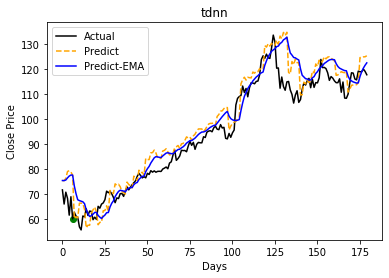

In [8]:
%matplotlib inline
simulator.plot(save=False,
               plot_pred_price=True,
               plot_buy_sell_point=True,
               in_range=[0,180])

In [9]:
if return_balance/BALANCE <= 1:
    print(f'Profit : -{round(1-return_balance/BALANCE, 4)*100}%')
else:
    print(f'Profit : {round(return_balance/BALANCE-1, 4)*100}%')

Profit : -0.16%


In [10]:
print(f'{"="*26} Sharpe Ratio {"="*26}')
print(f'||\tYear\t||\tReal Data\t||\tPredict Data\t||')
for idx in range(len(sharpe_ratio_real)):
    print(f'||\t{idx+1}\t||\t{round(sharpe_ratio_real[idx], 6)}\t||\t{round(sharpe_ratio_pred[idx], 6)}\t||')

========================== Sharpe Ratio ==========================
||	Year	||	Real Data	||	Predict Data	||
||	1	||	1.62506	||	1.292084	||


In [27]:
tickers=['AAPL','AMZN','FB','GOOG','MMM','MSFT','NFLX','NKE','NVDA','INTC','CSCO','WMT','TSLA','EBAY',
         'ORCL','CBG.BK','OSP.BK','BBL.BK','SCB.BK','LH.BK','MINT.BK','PTT.BK','BANPU.BK','ADVANC.BK',
         'TRUE.BK','AOT.BK','BEM.BK','BTS.BK','CPALL.BK','CPN.BK']
df = pd.DataFrame(columns=list(['Stock','Sharp_ratio', 'Profit ']))
for stock in tickers:
    DATA_CSV_PATH = stock
    MODEL_TYPE = 'tdnn_pso'
    simulator = Simulator(csv_file_path=DATA_CSV_PATH,
                     model_type=MODEL_TYPE,
                     balance=BALANCE,
                     buy_limit_from_balance_portion=BUY_LIMIT_FROM_BALANCE_PORTION,
                     trade_base_fee=TRADE_BASE_FEE,
                     trade_fee=TRADE_FEE,
                     vat=VAT,
                     cut_loss=CUT_LOSS,
                     unit_multiplier=UNIT_MULTIPLIER,
                     trade_sensitivity=TRADE_SENSITIVITY,
                     ema_alpha=EMA_ALPHA,
                     adaptive_ema_alpha=ADAPTIVE_EMA_ALPHA,
                     trade_freq=TRADE_FREQUENCY,
                     annualized_rf=ANNUALIZED_RISK_FREE_RATE)
    return_balance, sharpe_ratio_real, sharpe_ratio_pred = simulator.run()
#     print(stock)
    if return_balance/BALANCE <= 1:
        profit = -round(1-return_balance/BALANCE, 4)*100
    else:
        profit = round(return_balance/BALANCE-1, 4)*100  
    sharp_ratio = sharpe_ratio_pred[0]
    df2 = pd.DataFrame({"Stock":[stock],"Sharp_ratio":[sharp_ratio], "Profit":[profit] })
    df = df.append(df2)

In [28]:
pd.options.display.float_format = '{:.4f}'.format
df

,Stock,Sharp_ratio,Profit,Profit
0,AAPL,1.3119,NaN,-0.1600
0,AMZN,1.2696,NaN,-13.0300
0,FB,1.1484,NaN,23.9500
0,GOOG,1.0710,NaN,37.5300
0,MMM,0.7034,NaN,4.7900
0,MSFT,1.0037,NaN,-5.6900
0,NFLX,0.9582,NaN,-0.0000
0,NKE,1.2104,NaN,-9.7000
0,NVDA,1.5496,NaN,16.1400
0,INTC,0.0608,NaN,-6.8900


In [29]:
df.to_csv("autotrade.csv")